In [1]:
# importing modules and packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io_utils import *
from plotting_utils import *
from analysis_utils import * 
from pathlib import Path
import pickle
import scipy
import seaborn as sns
import scipy.stats as stats
sns.set_context("talk")

In [2]:
animalsAgg = ['29L','3095','3096','3097','30B','30L','30R2','4013','4014','4015','4016','91R2'] # list of all aniamls
animalsObs = ['29L','30R2','86L', '87L2','927L','927R','933R'] # list of observer animals
animalsToy = ['583L2','583B','86L2', '87B', '87L','87R2'] # list of toy group animals
animalsAll = animalsAgg + animalsObs + animalsToy
groupsAll = ['agg' for i in range(len(animalsAgg))] + ['obs' for i in range(len(animalsObs))] + ['toy' for i in range(len(animalsToy))]
maxRegions = ['PrL (E)', 'PrL (I)', 'vLS (E)', 'vLS (I)', 'POA (E)', 'POA (I)', 'BNST (E)', 'BNST (I)', 'AH (E)', 'AH (I)', 'MeA (E)', 'MeA (I)', 'VMH (E)', 'VMH (I)', 'PAG (E)', 'PAG (I)', 'PMv (E)', 'PMv (I)', 'LHb (E)', 'LHb (I)', 'PA (E)', 'PA (I)', 'NAc (DA)']

# only some of interest
featuresList = ["proximity","resident centroid roc 500 ms", "intruder centroid roc 500 ms", 'resident2intruder head-tti','resident2intruder head2head angle', "resident tti2head", "intruder tti2head"]


In [3]:
Nbin = 20
indices_agg = list(range(len(animalsAgg)))
indices_obs = list(range(len(animalsAgg),len(animalsAgg)+len(animalsObs)))
indices_toy = list(range(len(animalsAgg)+len(animalsObs),len(animalsAgg)+len(animalsObs)+len(animalsToy)))
print(indices_agg)
print(indices_obs)
print(indices_toy)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[12, 13, 14, 15, 16, 17, 18]
[19, 20, 21, 22, 23, 24]


In [15]:
W_map_all = np.ma.empty((len(animalsAll), len(maxRegions), len(featuresList), Nbin+1), dtype=float)
W_map_all.mask = True
W_map_group = np.ma.empty((len(animalsAll), len(maxRegions), len(featuresList), Nbin+1), dtype=float)
W_map_group.mask = True
best_alpha_all = np.ma.empty((len(animalsAll), len(maxRegions), len(featuresList)), dtype=float)
best_alpha_all.mask = True
best_alpha_group = np.ma.empty((len(animalsAll), len(maxRegions), len(featuresList)), dtype=float)
best_alpha_group.mask = True
r2_animal_test_all = np.ma.empty((len(animalsAll), len(maxRegions), len(featuresList)), dtype=float)
r2_animal_test_all.mask = True
r2_animal_test_group = np.ma.empty((len(animalsAll), len(maxRegions), len(featuresList)), dtype=float)
r2_animal_test_group.mask = True
mse_animal_test_all = np.ma.empty((len(animalsAll), len(maxRegions), len(featuresList)), dtype=float)
mse_animal_test_all.mask = True
mse_animal_test_group = np.ma.empty((len(animalsAll), len(maxRegions), len(featuresList)), dtype=float)
mse_animal_test_group.mask = True

for ind in range(len(animalsAll)):
    animal_without = animalsAll[ind]
    group_without = groupsAll[ind]

    df = load_and_wrangle(mouseId=animal_without, group=group_without, path=None, overwrite=False)
    regions = get_regions_dataframe(df)
    for region in regions:
        region_ind = maxRegions.index(region)
        # np.load(f'../data/{animal_without}/{animal_without}_{group_without}_test_MAP-estimation_day9_region={region}.npz')
        data = np.load(f'../data/{animal_without}/{animal_without}_{group_without}_test_MAP-estimation_day9_region={region}.npz', allow_pickle=True)
        W_map1 = data['W_map_all']
        W_map2 = data['W_map_group']
        best_alpha_all[ind, region_ind] = data['best_alpha_all']
        best_alpha_group[ind, region_ind] = data['best_alpha_group']
        r2_animal_test_all[ind, region_ind] = data['r2_animal_test_all']
        r2_animal_test_group[ind, region_ind] = data['r2_animal_test_group']
        mse_animal_test_all[ind, region_ind] = data['mse_animal_test_all']
        mse_animal_test_group[ind, region_ind] = data['mse_animal_test_group']
        
        for ind_feature in range(len(featuresList)):
            W_map_all[ind,region_ind,ind_feature] = W_map1[ind_feature]
            W_map_group[ind,region_ind,ind_feature] = W_map2[ind_feature]

In [16]:
print(best_alpha_all)
print(best_alpha_group)

[[[100000.0 100000.0 100000.0 ... 100000.0 100000.0 100000.0]
  [100000.0 100000.0 100000.0 ... 100000.0 100000.0 100000.0]
  [100000.0 100000.0 100000.0 ... 100000.0 100000.0 100000.0]
  ...
  [100000.0 100000.0 100000.0 ... 100000.0 100000.0 100000.0]
  [100000.0 100000.0 100000.0 ... 100000.0 100000.0 100000.0]
  [100000.0 100000.0 100000.0 ... 100000.0 100000.0 100000.0]]

 [[100000.0 100000.0 100000.0 ... 100000.0 100000.0 100000.0]
  [100000.0 100000.0 100000.0 ... 100000.0 100000.0 100000.0]
  [100000.0 100000.0 100000.0 ... 100000.0 100000.0 100000.0]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [100000.0 100000.0 100000.0 ... 100000.0 100000.0 100000.0]]

 [[100000.0 100000.0 100000.0 ... 100000.0 100000.0 100000.0]
  [100000.0 100000.0 100000.0 ... 100000.0 100000.0 100000.0]
  [100000.0 100000.0 100000.0 ... 100000.0 100000.0 100000.0]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 ...

 [[31622.776601683792 31622.776601

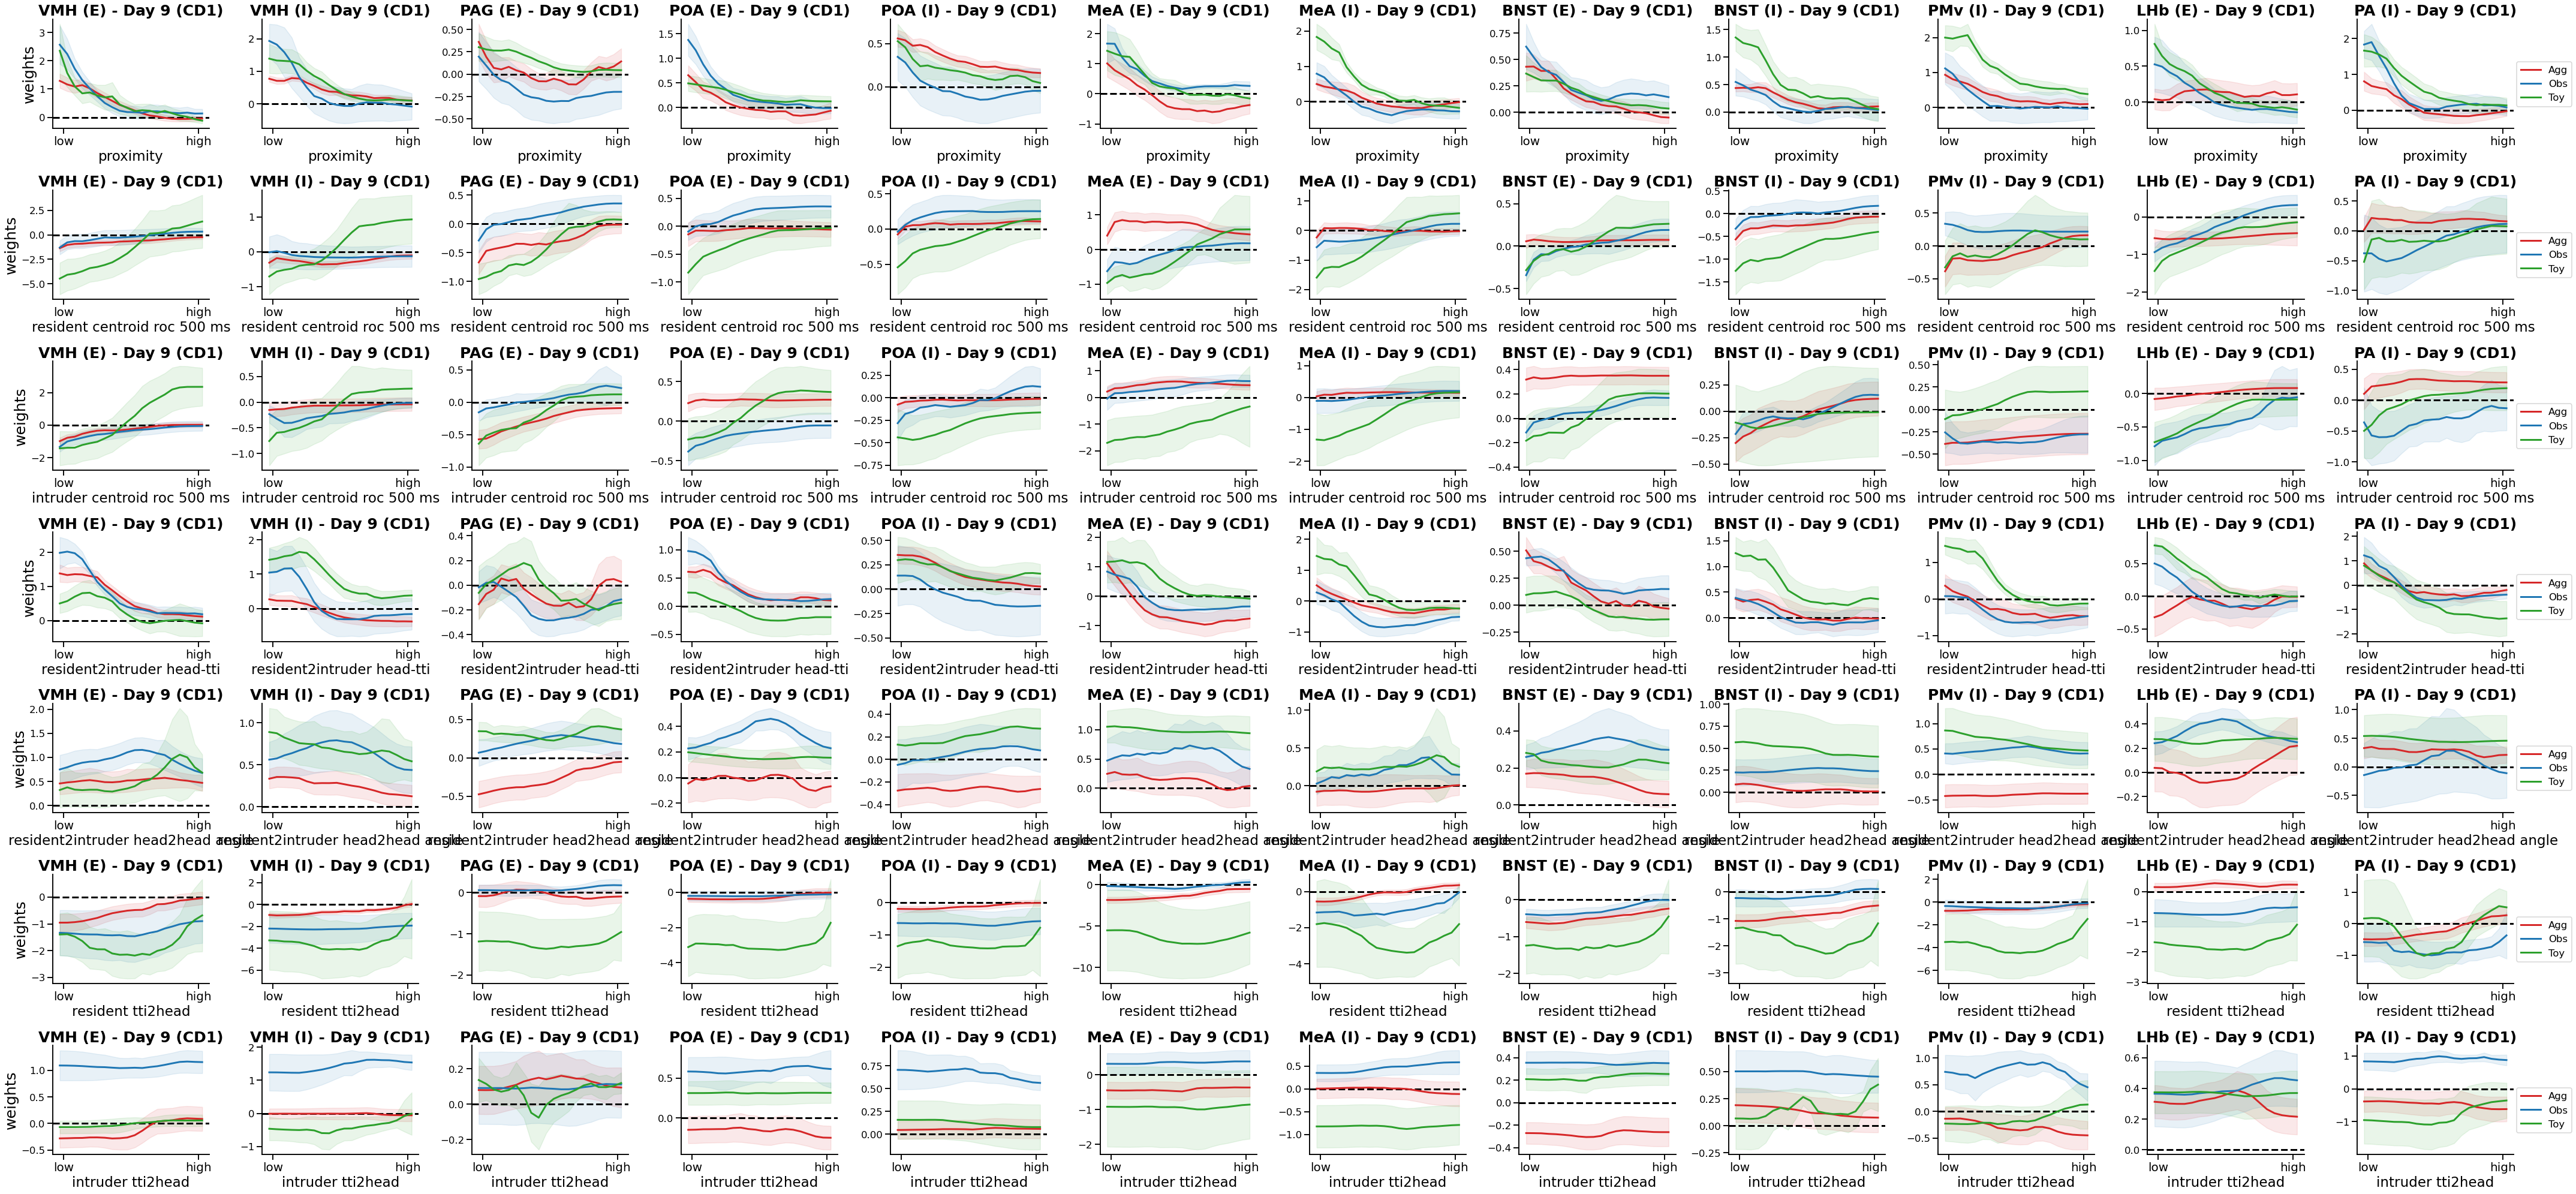

In [18]:
# plots of tuning curves for day 9

from scipy.stats import ttest_ind, ttest_rel
regionsInterest = [12,13,14,4,5,10,11,6,7,17,18,21] #ind_sort[0:13]#[0,1,2,3,4,5,6,7,8,9,10,11]
set = 1
# regionsInterest = [0,1,2,3,8,9,17,18,19,20,15,16]
# set = 2

featuresInterest_index = [x for x in range(len(featuresList))]

fig, axes = plt.subplots(nrows=len(featuresList), ncols=len(regionsInterest), figsize=(5 * len(regionsInterest), 4 * len(featuresList)))
b = 0
for feature_ind in featuresInterest_index:

    c = 0
    for region_ind in regionsInterest:
        
        axes[b,c].axhline(0, color = 'black', ls = 'dashed', linewidth=3)

        w_agg = W_map_group[indices_agg,region_ind, feature_ind, 1:]
        axes[b,c].plot(w_agg.mean(axis=0), color='tab:red', label=f'Agg', linewidth=3)
        axes[b,c].fill_between(range(20), w_agg.mean(axis=0) - 2 * w_agg.std(axis=0), w_agg.mean(axis=0) + 2 * w_agg.std(axis=0), alpha=0.1, color='tab:red')#cmapRed.to_rgba(Nday_ind/1.5+4)) 
        
        w_obs = W_map_group[indices_obs,region_ind, feature_ind, 1:]
        axes[b,c].plot(w_obs.mean(axis=0), color='tab:blue', label=f'Obs', linewidth=3)
        axes[b,c].fill_between(range(20), w_obs.mean(axis=0) - 2 * w_obs.std(axis=0), w_obs.mean(axis=0) + 2 * w_obs.std(axis=0), alpha=0.1, color='tab:blue')#cmapRed.to_rgba(Nday_ind/1.5+4)) 
        
        w_toy = W_map_group[indices_toy,region_ind, feature_ind, 1:]
        # axes[b,c].scatter(-1, weightsAllToy_Days[:,region_ind, feature_ind, 0, Nday_last].mean(axis=0), label=f'Toy', linewidth=3)
        axes[b,c].plot(w_toy.mean(axis=0), color='tab:green', label=f'Toy', linewidth=3)
        axes[b,c].fill_between(range(20), w_toy.mean(axis=0) - 2 * w_toy.std(axis=0), w_toy.mean(axis=0) + 2 * w_toy.std(axis=0), alpha=0.1, color='tab:green')#cmapRed.to_rgba(Nday_ind/1.5+4)) 

        axes[b,c].set_xticks([0.5,18.5],['low','high'], size=20)
        axes[b,0].set_ylabel('weights', size=25)
        axes[b,c].set_title(f'{maxRegions[region_ind]} - Day 9 (CD1)', weight='bold', size=25)
        axes[b,c].spines[['right', 'top']].set_visible(False)
        axes[b,c].set_xlabel(featuresList[feature_ind],size=23)
    
        # if feature_ind == 0:
        #     axes[b,c].set_ylim(-1.2,1.2)
        #     axes[b,c].set_xlabel('proximity',size=23)
        #     axes[b,c].set_xticks([0.5,18.5],['close','far'], size=20)
        # elif feature_ind == 1:
        #     # axes[b,c].set_ylim(-0.3,1.3)
        #     axes[b,c].set_xlabel('resident speed',size=23)
        # elif feature_ind == 2:
        #     # axes[b,c].set_ylim(-0.3,1)
        #     axes[b,c].set_xlabel('intruder speed',size=23)
        # elif feature_ind == 3:
        #     # axes[b,c].set_ylim(-0.5,0.6)
        #     axes[b,c].set_xlabel('res2intr head-head distance',size=23)
        #     axes[b,c].set_xticks([0.5,18.5],['close','far'], size=20)
        # elif feature_ind == 4:
        #     # axes[b,c].set_ylim(-0.5,0.8)
        #     axes[b,c].set_xlabel('res2intr head-tti distance',size=23) 
        #     axes[b,c].set_xticks([0.5,18.5],['close','far'], size=20)
        # elif feature_ind == 5:
        #     # axes[b,c].set_ylim(-0.4,0.4)
        #     axes[b,c].set_xlabel('res2intr head-head angle',size=23)
        # elif feature_ind == 6:
        #     # axes[b,c].set_ylim(-0.4,0.35)
        #     axes[b,c].set_xlabel('res2intr head-tti angle',size=23)
        # elif feature_ind == 7:
        #     # axes[b,c].set_ylim(-0.25,0.25)
        #     axes[b,c].set_xlabel('intr2res head-centroid angle',size=23)
        # elif feature_ind == 8:
        #     # axes[b,c].set_ylim(-0.5,0.8)
        #     axes[b,c].set_xlabel(featuresLonglist[feature_ind],size=23)
        # elif feature_ind == 9:
        #     # axes[b,c].set_ylim(-0.25,0.4)
        #     axes[b,c].set_xlabel(featuresLonglist[feature_ind],size=23)

        # axes[b,c].set_ylim(-1,1.4)

        # # last day
        # axes[feature_ind].plot(W_map[feature_ind, Nday_ind][1:], color='black', label=f'Test - Day 9')
        # axes[feature_ind].set_xlabel(featuresLonglist[feature_ind])  
        c += 1 

        
    axes[b,-1].legend(loc=(1.02,0.2))
    b += 1
    # fig.suptitle('Aggression group: ' + featuresLonglist[feature_ind], size=25, y=1.02)
fig.tight_layout()
plt.savefig(f'../figures/TuningCurves_Groups_Day-9_Set={set}.png', bbox_inches='tight', dpi=400)

In [38]:
# significance test for day 9 - done separately for each region and feature
curves_significant = []
for feature_ind in featuresInterest_index:
    # print(featuresList[feature_ind])
    for region_ind in range(len(maxRegions)):
        # print(maxRegions[region_ind])
        
        # CHECKHOW NANS ARE HANDLED
        # print((r2_animal_test_all[anim, region_ind, feature_ind]))
        # print((r2_animal_test_group[:, region_ind, feature_ind]))

        # # # # r2 testing
        # t, p = stats.ttest_rel(r2_animal_test_all[:, region_ind, feature_ind],r2_animal_test_group[:, region_ind, feature_ind])
        # if (p < 0.05 and t<0): # r2 (error) for r2_animal_test_all if t > 0
        # # print(t)
        #     print('r2')
        #     curves_significant.append([region_ind,feature_ind])
        #     # print(featuresList[feature_ind])
        #     # print(maxRegions[region_ind])
        #     print(t)
        #     print(p)
            
        
        # mse testing
        t, p = stats.ttest_rel(r2_animal_test_all[:, region_ind, feature_ind],r2_animal_test_group[:, region_ind, feature_ind])
        # print(t)
        if (p<0.05 and t>0): # bigger mse (error) for r2_animal_test_all if t > 0
            print("mse")
            curves_significant.append([region_ind,feature_ind])
            print(featuresList[feature_ind])
            print(maxRegions[region_ind])
        

mse
proximity
MeA (E)
mse
intruder centroid roc 500 ms
BNST (E)
mse
resident2intruder head-tti
MeA (E)
mse
resident2intruder head2head angle
POA (I)
mse
resident2intruder head2head angle
BNST (E)
mse
resident tti2head
PrL (I)
mse
resident tti2head
BNST (E)
mse
intruder tti2head
POA (I)
mse
intruder tti2head
BNST (E)
mse
intruder tti2head
VMH (E)


In [40]:
print(curves_significant)

[[10, 0], [6, 2], [10, 3], [5, 4], [6, 4], [1, 5], [6, 5], [5, 6], [6, 6], [12, 6]]


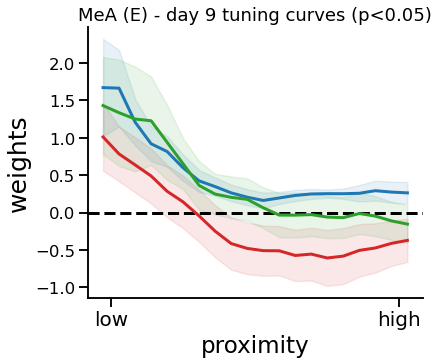

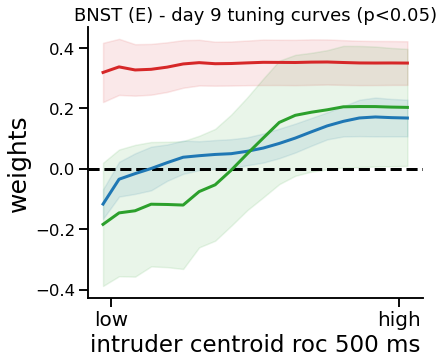

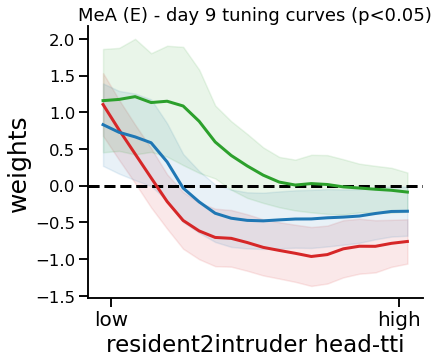

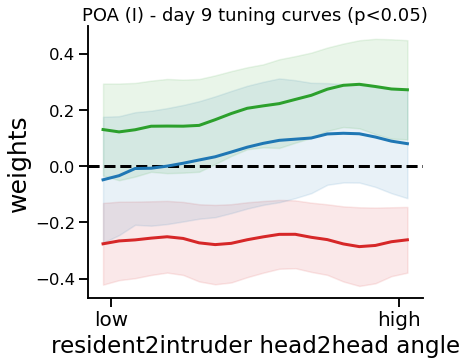

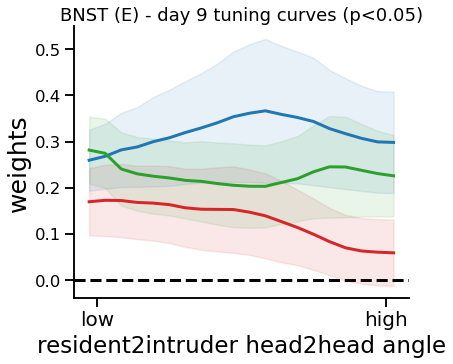

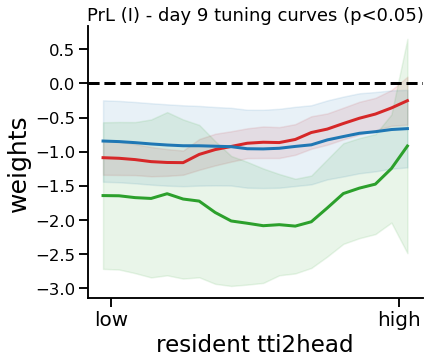

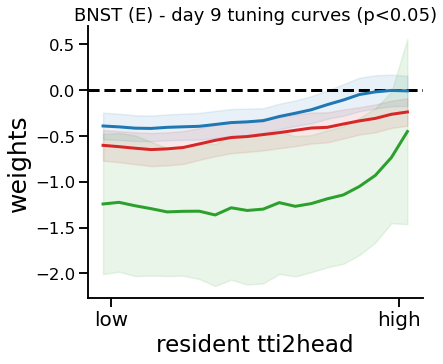

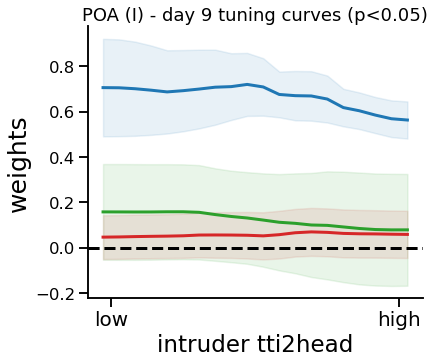

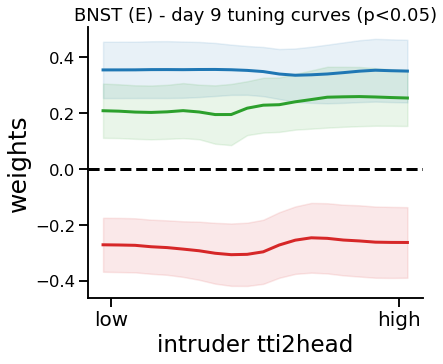

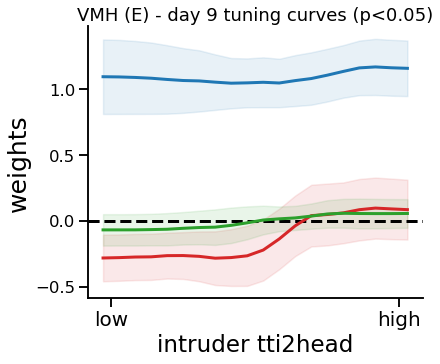

In [44]:
for ind in range(len(curves_significant)):
    fig, axes = plt.subplots(figsize=(6,5))
    axes.set_title(f'{maxRegions[curves_significant[ind][0]]} - day 9 tuning curves (p<0.05)')
    axes.axhline(0, color = 'black', ls = 'dashed', linewidth=3)

    w_agg = W_map_group[indices_agg,curves_significant[ind][0], curves_significant[ind][1], 1:]
    axes.plot(w_agg.mean(axis=0), color='tab:red', label=f'Agg', linewidth=3)
    axes.fill_between(range(20), w_agg.mean(axis=0) - 2 * w_agg.std(axis=0), w_agg.mean(axis=0) + 2 * w_agg.std(axis=0), alpha=0.1, color='tab:red')#cmapRed.to_rgba(Nday_ind/1.5+4)) 
        
    w_obs = W_map_group[indices_obs,curves_significant[ind][0], curves_significant[ind][1], 1:]
    axes.plot(w_obs.mean(axis=0), color='tab:blue', label=f'Obs', linewidth=3)
    axes.fill_between(range(20), w_obs.mean(axis=0) - 2 * w_obs.std(axis=0), w_obs.mean(axis=0) + 2 * w_obs.std(axis=0), alpha=0.1, color='tab:blue')#cmapRed.to_rgba(Nday_ind/1.5+4)) 
        
    w_toy = W_map_group[indices_toy,curves_significant[ind][0], curves_significant[ind][1], 1:]
    # axes[b,c].scatter(-1, weightsAllToy_Days[:,region_ind, feature_ind, 0, Nday_last].mean(axis=0), label=f'Toy', linewidth=3)
    axes.plot(w_toy.mean(axis=0), color='tab:green', label=f'Toy', linewidth=3)
    axes.fill_between(range(20), w_toy.mean(axis=0) - 2 * w_toy.std(axis=0), w_toy.mean(axis=0) + 2 * w_toy.std(axis=0), alpha=0.1, color='tab:green')#cmapRed.to_rgba(Nday_ind/1.5+4)) 

    axes.set_xticks([0.5,18.5],['low','high'], size=20)
    axes.set_ylabel('weights', size=25)
    # axes.set_title(f'{maxRegions[region_ind]} - Day 9 (CD1)', weight='bold', size=25)
    axes.spines[['right', 'top']].set_visible(False)
    axes.set_xlabel(featuresList[curves_significant[ind][1]],size=23)
    